# Laboratorio de regresión - 1

## Regresión lineal simple

|                |                    |
:----------------|--------------------|
| **Nombre**     | André Esteban Vera |
| **Fecha**      | 24/08/2025         |
| **Expediente** | 745232             |

La regresión lineal es una herramienta útil para predecir una respuesta cuantitativa. Sirve como un punto de partida a pesar de que existen soluciones más modernas.

Observa la siguiente gráfica.

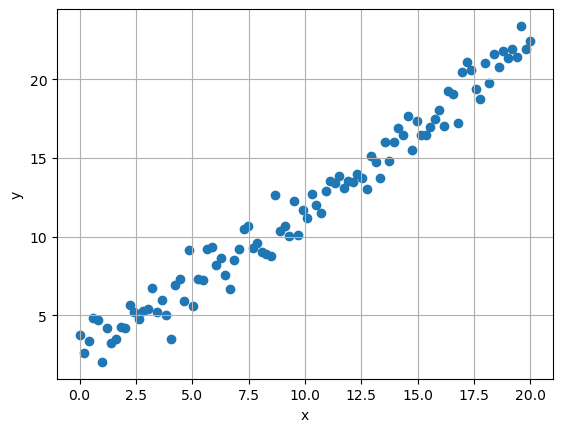

R^2 = 0.9703537814132045


In [6]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(0, 20, 100); y = 2 + x + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()

plt.show()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X = x.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
R2 = reg.score(X, y)
print(f"R^2 = {R2}")

**¿Hay alguna relación entre $y$ y $x$?**
- Si, la nube de dispersión muestra una tendencia lineal positiva: conforme x aumenta, y tambien lo hace

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- **¿Por qué?**
- Para saber que tan bueno es nuestro modelo y poder generar conclusiones y pruebas adecuadas

- Si hubiera una asociación, **¿qué tan fuerte es?**
- Podemos ver al sacar el coeficiente de determinacion que es bastante fuerte: 0.97

## Regresión lineal simple

Un método sencillo para predecir una variable cuantitativa $Y$ dado un solo predictor $X$. Podemos escribir esta relación como:

$$ Y \approx \beta_0 + \beta_1 X$$


A $\beta_0$ y $\beta_1$ se le conoce como los coeficientes o parámetros del modelo. Una vez que usamos los datos históricos para producir estimados $\hat{\beta_0}$ y $\hat{\beta_1}$, podemos predecir el resultado de la variable $y$ basándonos en $x$
$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $$

donde $\hat{y}$ indica una predicción de $Y$ basado en $X = x$. (El símbolo $\hat{ }$ se usa para hacer notar que es sólo una estimación de un parámetro desconocido)

### Estimando coeficientes

$\beta_0$ y $\beta_1$ son desconocidos. Se deben estimar usando los datos antes de poder predecir. 

$ (x_1, y_1), (x_2, y_2), ..., (x_n, y_n) $ representa $n$ observaciones, cada una con datos medidos para $X$ y $Y$.

Nuestros datos contienen 200 muestras en pares ordenados $(x_i, y_i)$. Nuestra meta actual es encontrar $\hat{\beta_0}$ y $\hat{\beta_1}$ tal que exista un modelo lineal que se ajuste bien a los datos ($y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i$  para $ i=1,...,n$).

**¿Qué significa "que se ajuste bien"?**
- Que la recta reproduce adecuadamente los datos.

Observa las 3 propuestas de lineas para ajustar los puntos.

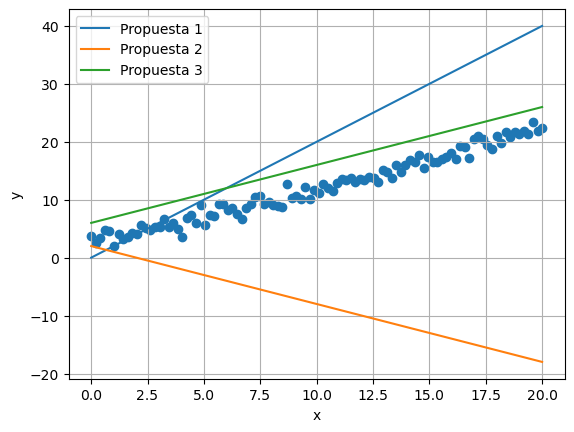

     Propuesta        R^2
0  Propuesta 1  -1.913146
1  Propuesta 2 -14.801045
2  Propuesta 3   0.513666


In [8]:
y_pred1 = 2*x; y_pred2 = -x + 2; y_pred3 = 6 + x
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()
plt.plot(x, y_pred1, label="Propuesta 1"); plt.plot(x, y_pred2, label="Propuesta 2"); plt.plot(x, y_pred3, label="Propuesta 3")
plt.legend(loc="best")
plt.show()

from sklearn.metrics import r2_score
import pandas as pd
R2_1 = r2_score(y, y_pred1)
R2_2 = r2_score(y, y_pred2)
R2_3 = r2_score(y, y_pred3)

tabla_r2 = pd.DataFrame({
    "Propuesta": ["Propuesta 1", "Propuesta 2", "Propuesta 3"],
    "R^2": [R2_1, R2_2, R2_3]
})
print(tabla_r2)


Claramente hay una línea que se ajusta mejor que las otras dos. ¿Cómo sabemos que esa línea es mejor que las otras?
- Visualmente porque es la más cercana a la nube de dispersión de los datos y estadisticamente porque su R^2 es más cercano a 1 que el de las demás, y tambien porque su pendiente coincide con la tendencia de los datos reales por lo que produce el menor error (RSS)

Hay muchas formas de medir el ajuste de una curva; la más común es usar el criterio de los mínimos cuadrados. Si $y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i$ es una predicción de $Y$ basada en el valor número $i$ de $X$, entonces definimos el error/residuo como $e_i = y_i - \hat{y_i}$. Este residuo es la diferencia entre el valor observado y el valor estimado por nuestro modelo lineal. Definimos la suma de los residuos cuadrados (RSS) como:
$$ \text{RSS} = e_1^2 + e_2^2 + ... + e_n^2 $$

Utiliza `sklearn` para estimar los parámetros del modelo.

In [9]:
from sklearn.linear_model import LinearRegression

X = x.reshape(-1, 1)
reg = LinearRegression().fit(X, y)


In [10]:
b1 = reg.coef_[0]
b0 = reg.intercept_
print(f"B0 (intercepto) = {b0}")
print(f"B1 (pendiente)  = {b1}")


B0 (intercepto) = 2.208471447842209
B1 (pendiente)  = 0.9851336567692277


In [13]:
y_hat = reg.predict(X)
y_hat[:5]

array([2.20847145, 2.40748835, 2.60650525, 2.80552215, 3.00453905])

Al resolver el problema analíticamente se encuentra:

$$ \hat{\beta_1} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

$$ \hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x} $$


Compara las estimaciones que encontraste con `sklearn` con las que se encuentran con la fórmula dada arriba ($\bar{x}$ y $\bar{y}$ son las medias muestrales).

In [14]:
x_bar = x.mean()
y_bar = y.mean()
num = ((x - x_bar) * (y - y_bar)).sum()
den = ((x - x_bar) ** 2).sum()
beta1_formula = num / den
beta0_formula = y_bar - beta1_formula * x_bar
print(f"B0_formula = {beta0_formula}")
print(f"B1_formula = {beta1_formula}")


B0_formula = 2.2084714478422054
B1_formula = 0.985133656769228


In [15]:
print(f"|B0_sklearn - B0_formula| = {abs(b0 - beta0_formula):.6e}")
print(f"|B1_sklearn - B1_formula| = {abs(b1 - beta1_formula):.6e}")


|B0_sklearn - B0_formula| = 3.552714e-15
|B1_sklearn - B1_formula| = 3.330669e-16


In [16]:
y_hat_formula = beta0_formula + beta1_formula * x
import numpy as np

np.allclose(y_hat, y_hat_formula) # para ver si coincide


True

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión.

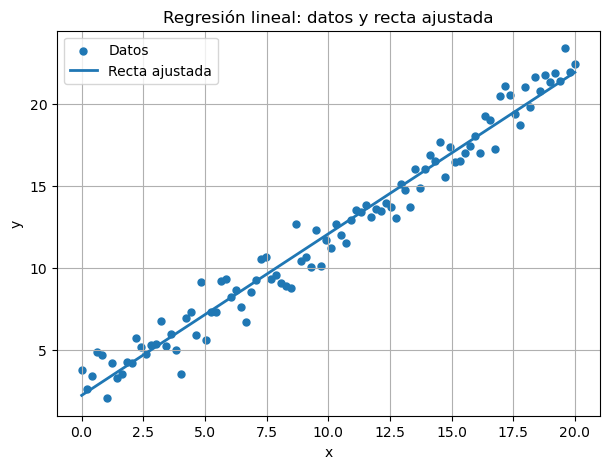

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(x, y, s=25, label="Datos")
plt.plot(x, y_hat, label="Recta ajustada", linewidth=2)
plt.xlabel("x");
plt.ylabel("y");
plt.title("Regresión lineal: datos y recta ajustada")
plt.grid(True);
plt.legend();
plt.show()


In [18]:
import pandas as pd

pd.DataFrame({"x": x, "y": y, "y_hat": y_hat}).head(10)


,x,y,y_hat
0,0.000000,3.764052,2.208471
1,0.202020,2.602177,2.407488
2,0.404040,3.382778,2.606505
3,0.606061,4.846954,2.805522
4,0.808081,4.675639,3.004539
5,1.010101,2.032823,3.203556
6,1.212121,4.162210,3.402573
7,1.414141,3.262784,3.601590
8,1.616162,3.512943,3.800607
9,1.818182,4.228780,3.999624


### Verificando la precisión del modelo

¿Cómo medimos qué tan bueno es nuestro modelo para predecir?
- RSE (Residual Standard Error)
- $R^2$

#### $R^2$

El RSE se mide con unidades de $Y$, así que no siempre se puede saber cuál es un buen valor. Imagina que tienes un $Y$ con valores entre $-1$ y $1$, y que tienes otro $Y$ con valores entre $1'000,000$ y $100'000,000$. Los errores cuadrados van a ser mucho mayores en el segundo caso que en el primero, pero esto no significa que el modelo creado en el segundo caso sea malo.

El estadístico $R^2$ es una medida de ajuste. Su valor es la proporción de la varianza sí explicada, así que siempre toma valores entre $0$ y $1$. Su fórmula es:

$$ R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}}$$
$$ \text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2$$

TSS mide la varianza total de $Y$. RSS mide la varianza que queda sin explicarse después de la regresión. Entonces TSS-RSS mide la varianza que sí está explicada.

$R^2$ mide la proporción de la varianza en $Y$ que puede ser explicada usando $X$.

El estadístico $R^2$ se puede encontrar accediendo a la función `score` del objeto `LinearRegression` de `sklearn`.

- **¿Cuánta varianza queda sin explicar?**

In [19]:
import numpy as np

n = len(y)
rss = np.sum((y - y_hat) ** 2)
rse = np.sqrt(rss / (n - 2))  # n-2 g.l. en regresión lineal simple
print(f"RSS = {rss}")
print(f"RSE = {rse}")


RSS = 100.83108534686123
RSE = 1.0143414740551526


In [20]:
tss = np.sum((y - y.mean()) ** 2)
r2_manual = 1 - rss / tss
r2_sklearn = reg.score(X, y)
print(f"R^2 (manual)         = {r2_manual}")
print(f"R^2 (sklearn .score) = {r2_sklearn:}")

R^2 (manual)         = 0.9703537814132045
R^2 (sklearn .score) = 0.9703537814132045


In [21]:
var_no_explicada = 1 - reg.score(X, y)
print(f"Varianza no explicada (1 - R^2) = {var_no_explicada}")

Varianza no explicada (1 - R^2) = 0.029646218586795503


## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3